In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iDEA
import ipywidgets as widgets
from IPython.display import display
import pickle
import time
from pathlib import Path
from multiplet_classes import CollectionOfStates
import multiplet_methods as mm
import os

# Initialize the system
points = 231
l = 10
x = np.linspace(-l, l, points)
dx = x[1] - x[0]
omega = 0.3275
v_ext = 0.5 * omega**2 * (x**2)
v_int = np.zeros([len(x), len(x)])
qho_single = iDEA.system.System(x, v_ext, v_int, electrons="u")
qho_double = iDEA.system.System(x, v_ext, v_int, electrons="ud")

states_small_int = {}
states_zero_int = {}
occupied_info = []

directory = Path("states")

for i in range(0, 1):
    file_path = directory / f"qho_small_int_state_{i}_1e-11.pkl"
    try:
        with file_path.open("rb") as file:
            states_small_int[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

for i in range(0, 51):
    file_path = directory / f"qho_zero_int_state_{i}.pkl"
    try:
        with file_path.open("rb") as file:
            states_zero_int[i] = pickle.load(file)
    except FileNotFoundError:
        print(f"File state_{i}.pkl not found.")
    except Exception as e:
        print(f"An error occurred while loading state_{i}.pkl: {e}")

# file_path = "occupied_info_231.pkl"
# with open(file_path, "rb") as file:
#     occupied_info = pickle.load(file)


with open("result_200.pkl", "rb") as file:
    index_list = pickle.load(file)

print(index_list)

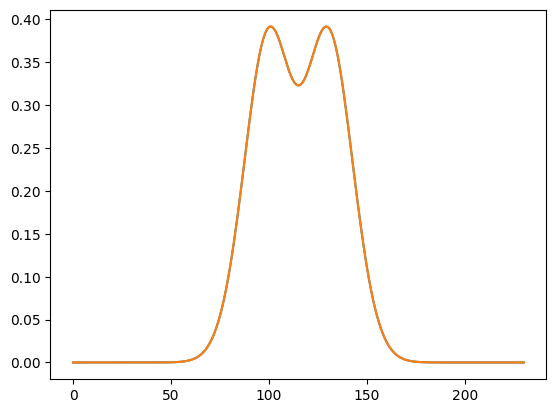

In [2]:
import iDEA.observables
import scipy.special as sp


n = iDEA.observables.density(qho_double, states_zero_int[1])

def wave_function(index, omega, x):
    exponent = -(omega * (x**2)) / (2)
    t = np.sqrt(1 / ((2**index) * sp.factorial(index))) * pow((omega/np.pi), 0.25) * np.exp(exponent) * sp.eval_hermite(index, np.sqrt(omega)*x)

    return t

n2 = (np.abs(wave_function(0, omega, x)) ** 2) + (np.abs(wave_function(1, omega, x)) ** 2)

plt.plot(n)
plt.plot(n2)

In [3]:
def states_density_comparison(states: dict, s: iDEA.system.System, collection: CollectionOfStates):
    # Initialize system

    x = s.x

    orbital_space = []
    analytic_space_1 = []

    for key, value in states.items():
        n = iDEA.observables.density(s, value)

        index_k = collection.up_indices[key]
        index_j = collection.down_indices[key]

        pd_analytic_1 = (np.abs(wave_function(index_k, omega, x)))**2 + (np.abs(wave_function(index_j, omega, x)))**2
        
        orbital_space.append(n)
        analytic_space_1.append(pd_analytic_1)

    # Ensure the directory for saving images exists
    output_dir = 'frames'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    # Define the function to plot the array
    def plot_array(k):
        plt.figure(figsize=(10, 6))
        plt.plot(x, orbital_space[k], "black")
        plt.plot(x, analytic_space_1[k], "b--")
        plt.title(f'State {k}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
        plt.legend(["Approximate prob. density", "Analytical prob. density"])
        plt.savefig(os.path.join(output_dir, f'fk_{k:03d}.png'))
        plt.show()

    for k in range(len(orbital_space)):
        plot_array(k)

    # Create a slider widget
    slider = widgets.IntSlider(value=0, min=0, max=len(orbital_space) - 1, step=1, description='k:')
    interactive_plot = widgets.interactive(plot_array, k=slider)
    
    # Display the interactive plot
    display(interactive_plot)

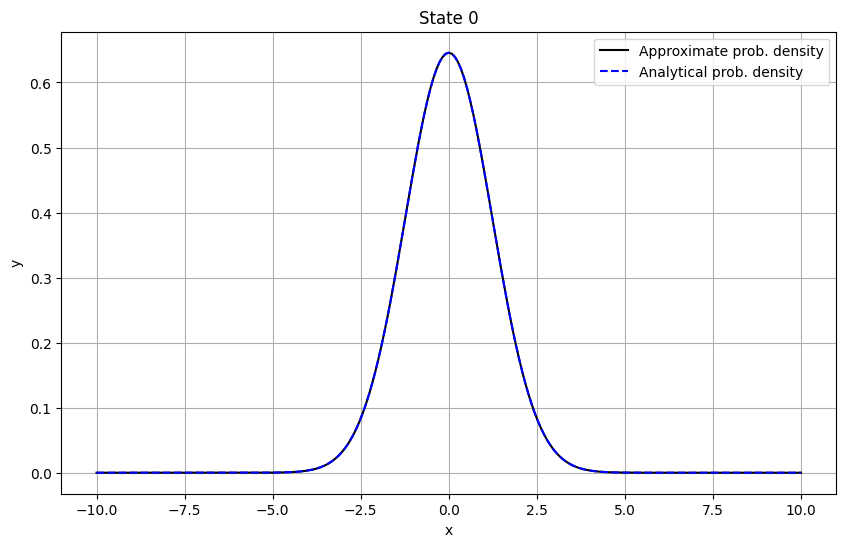

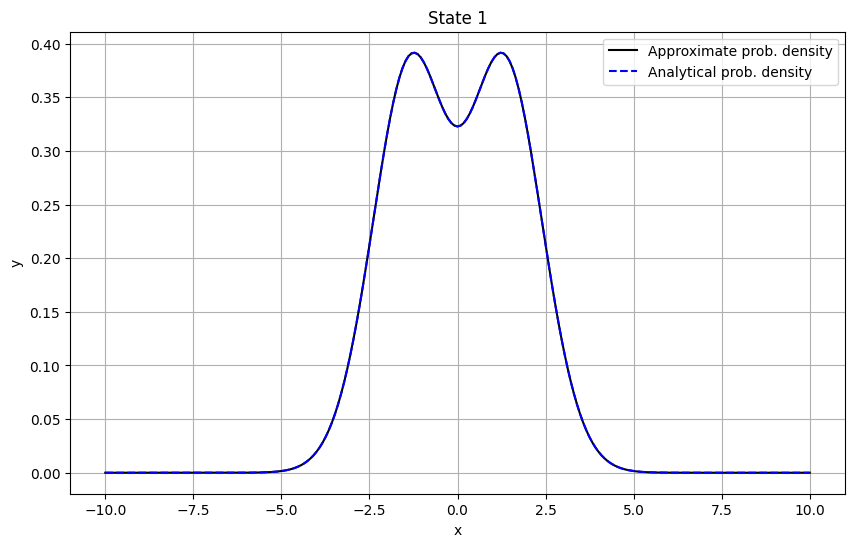

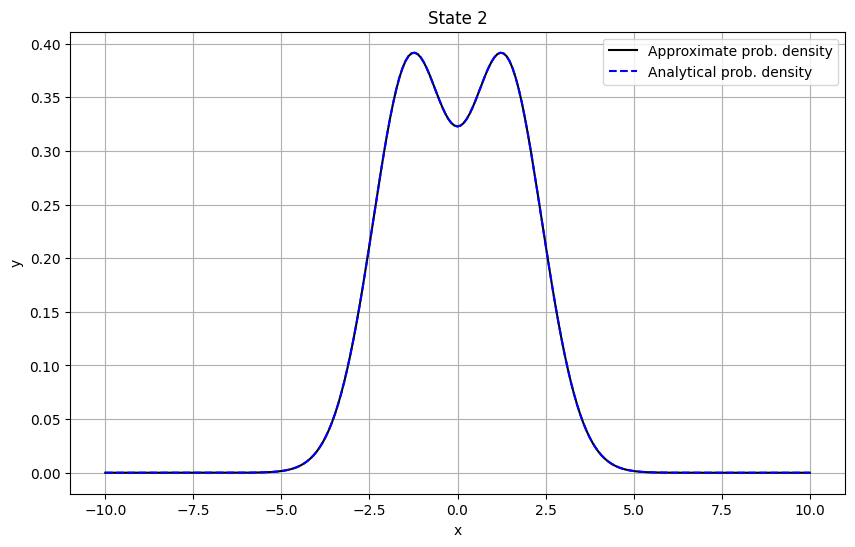

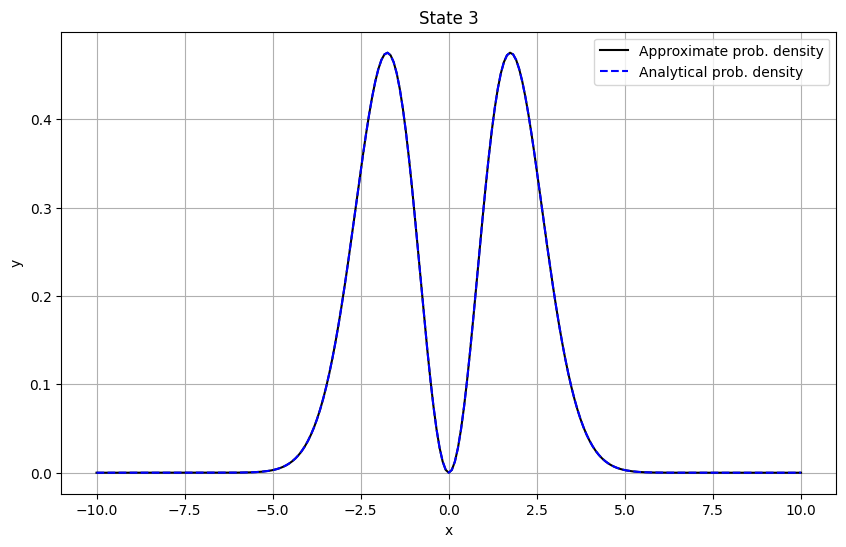

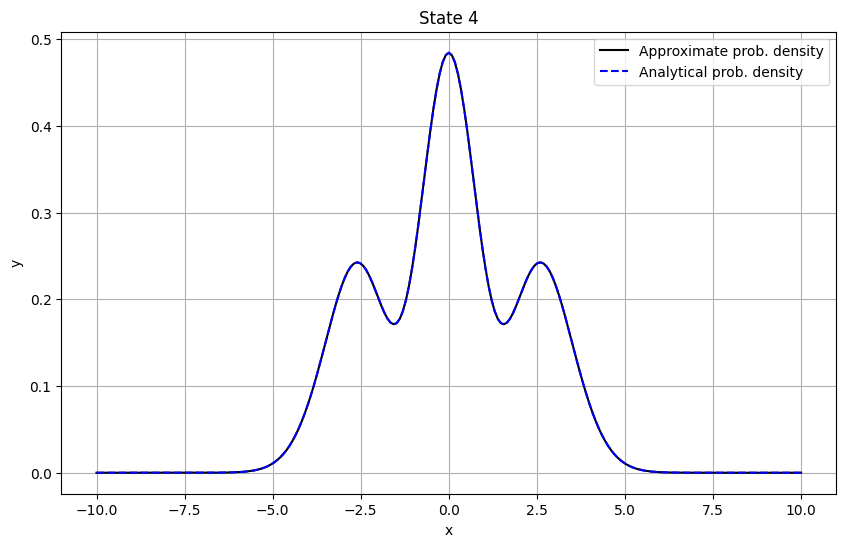

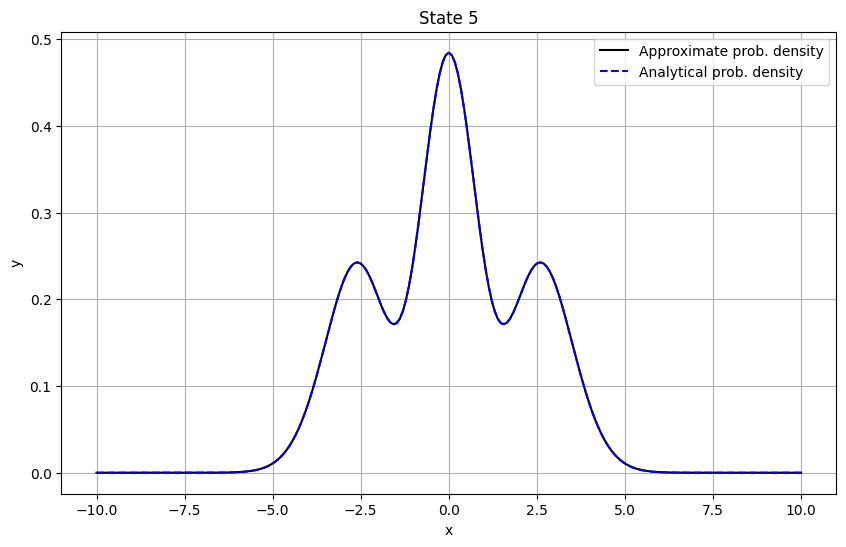

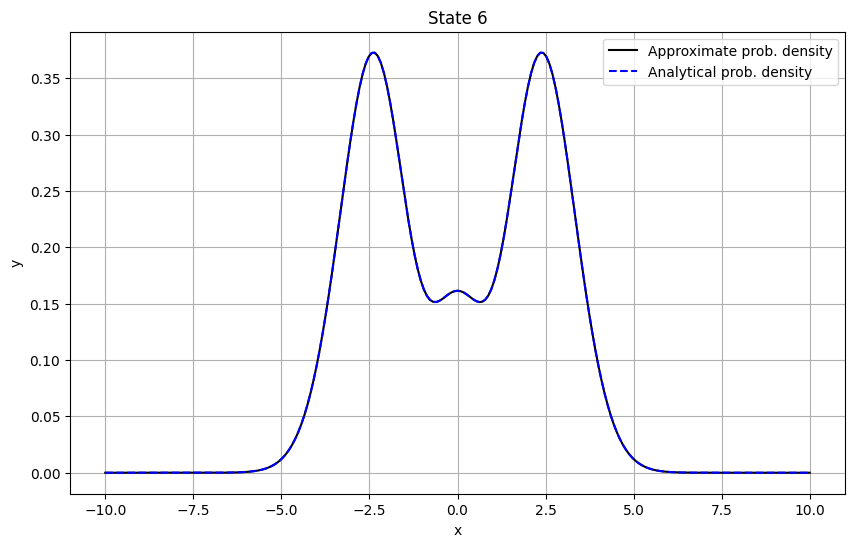

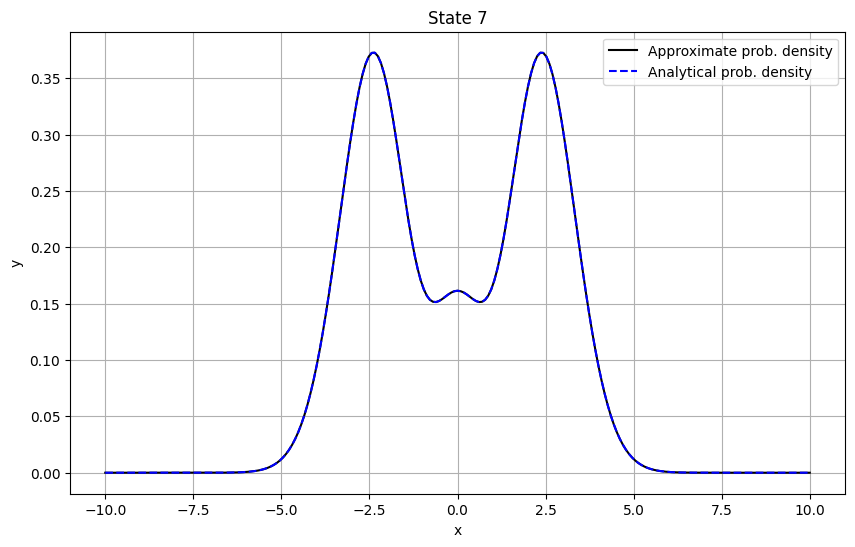

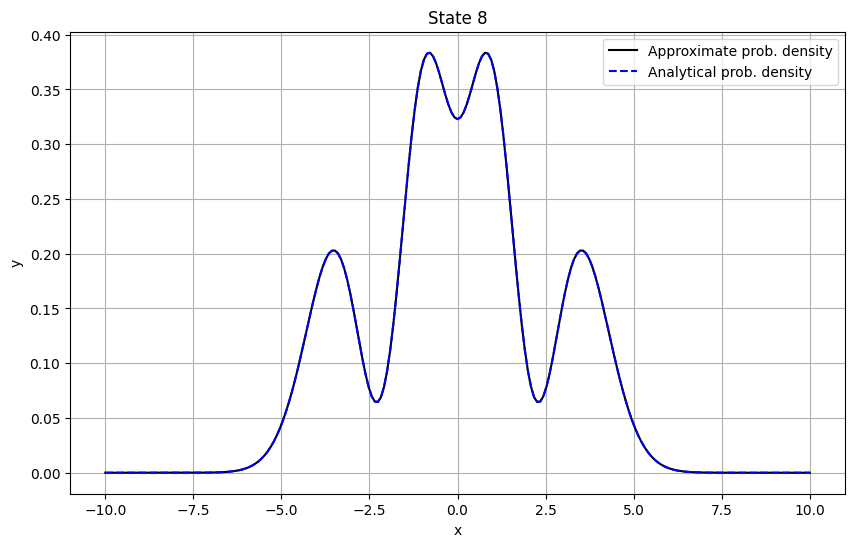

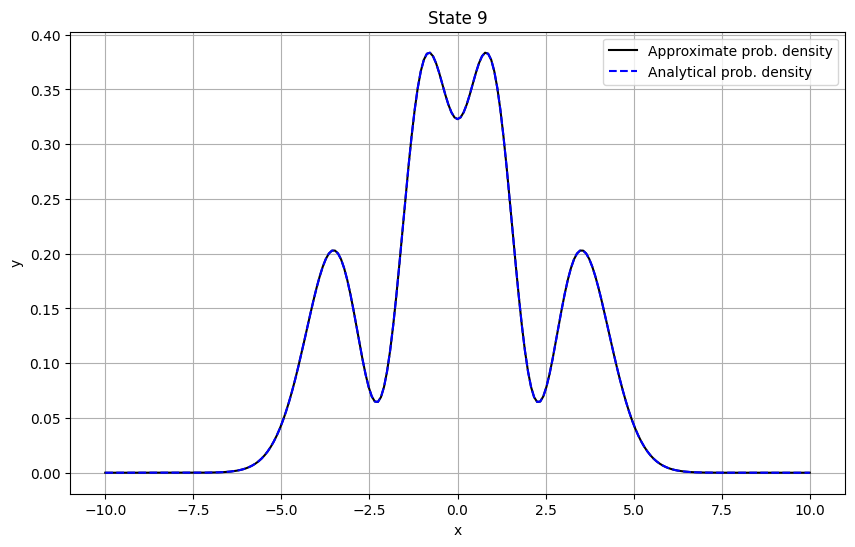

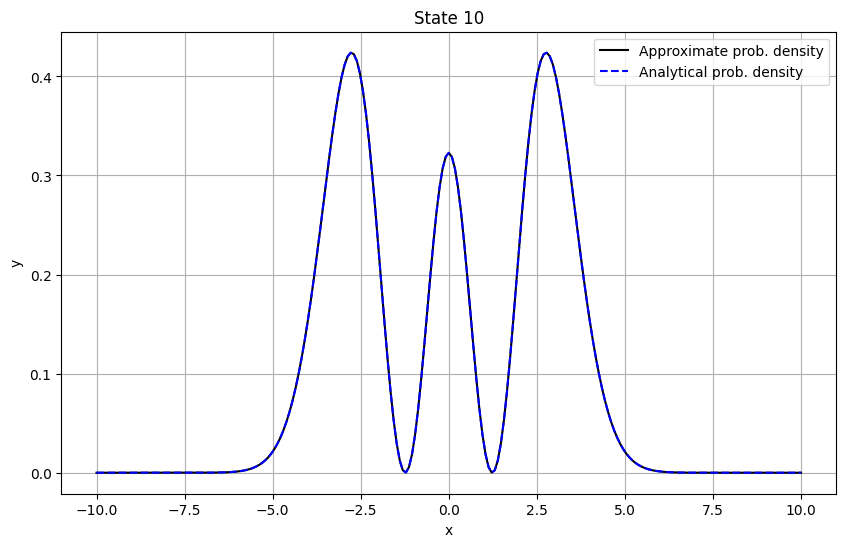

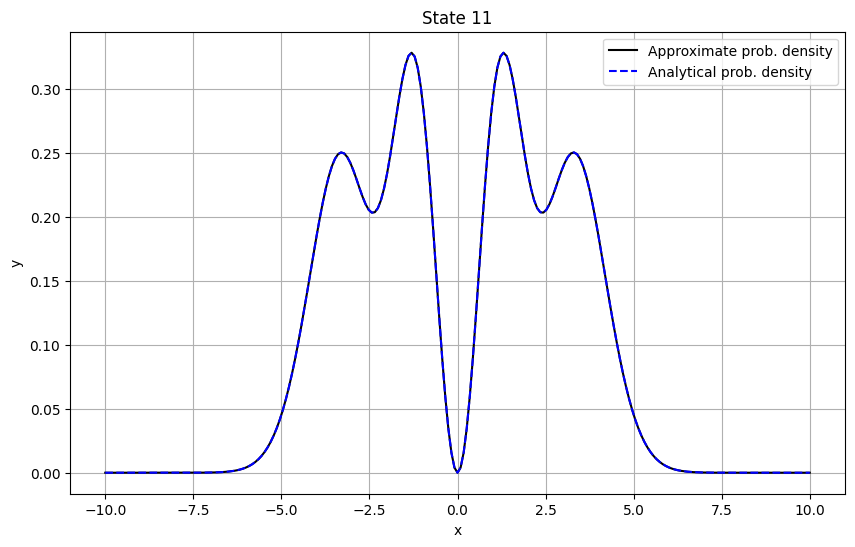

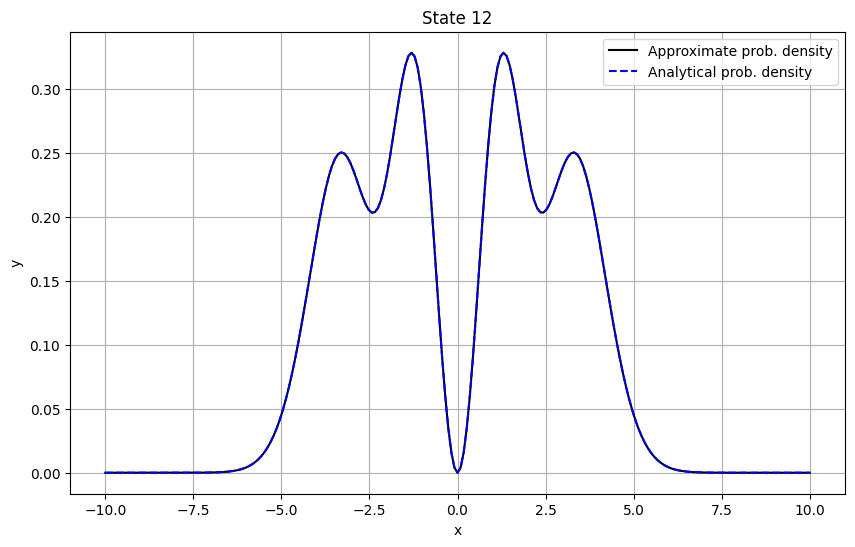

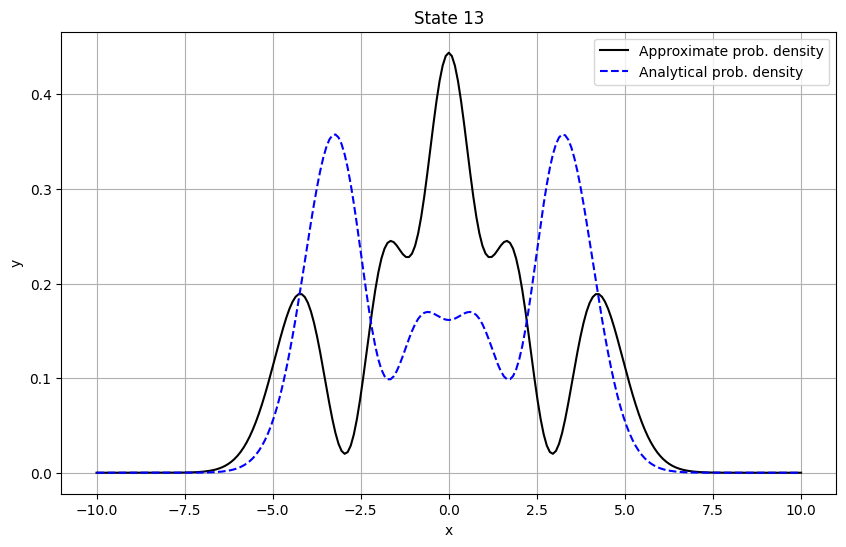

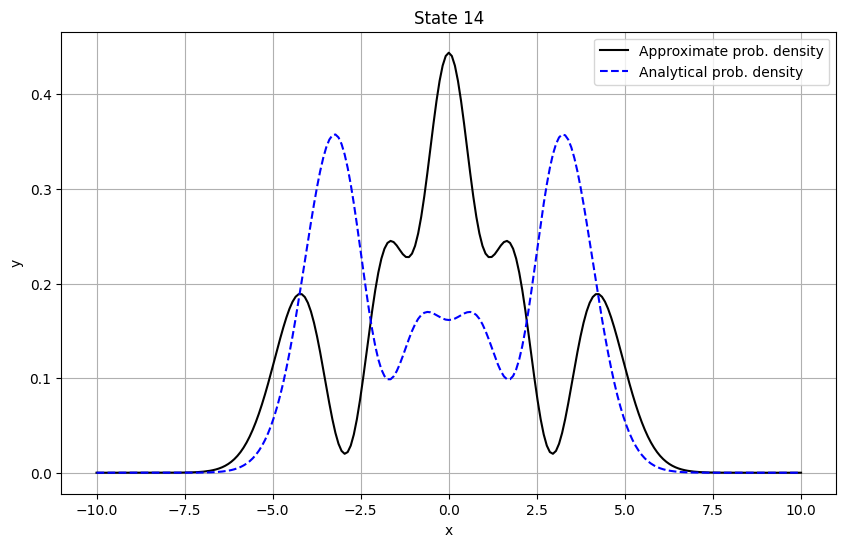

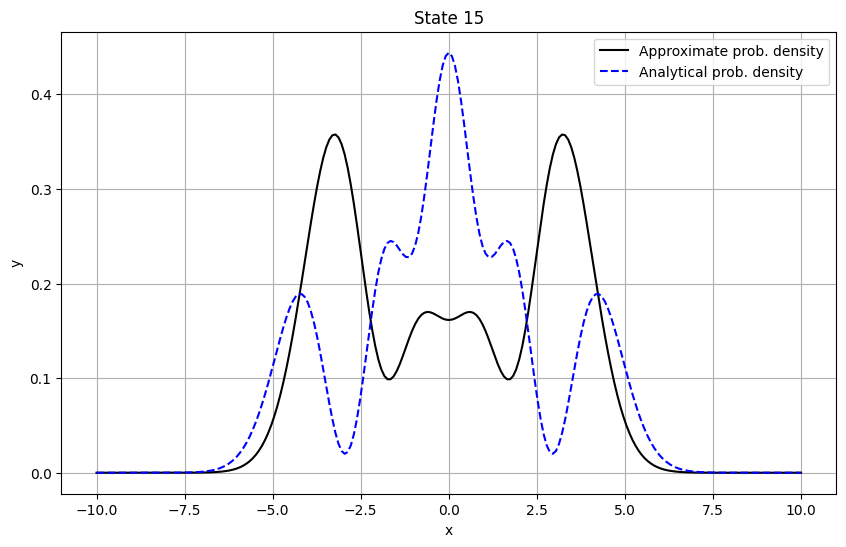

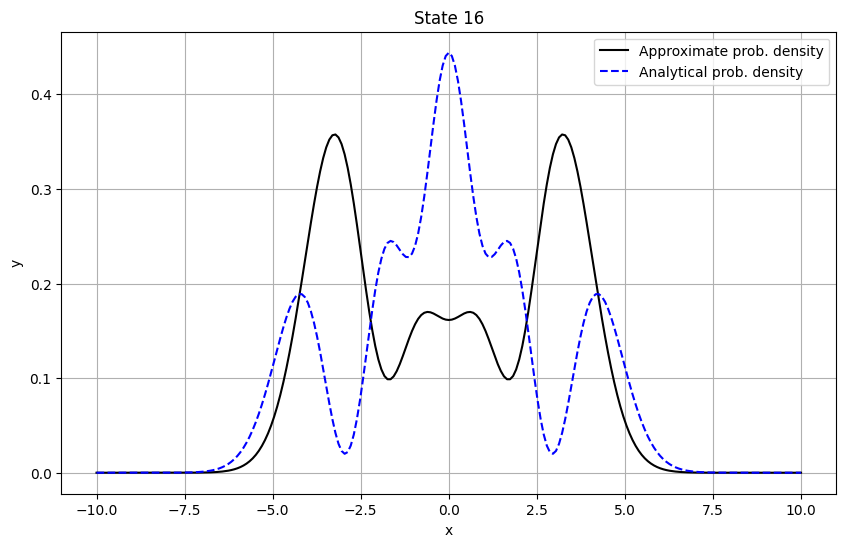

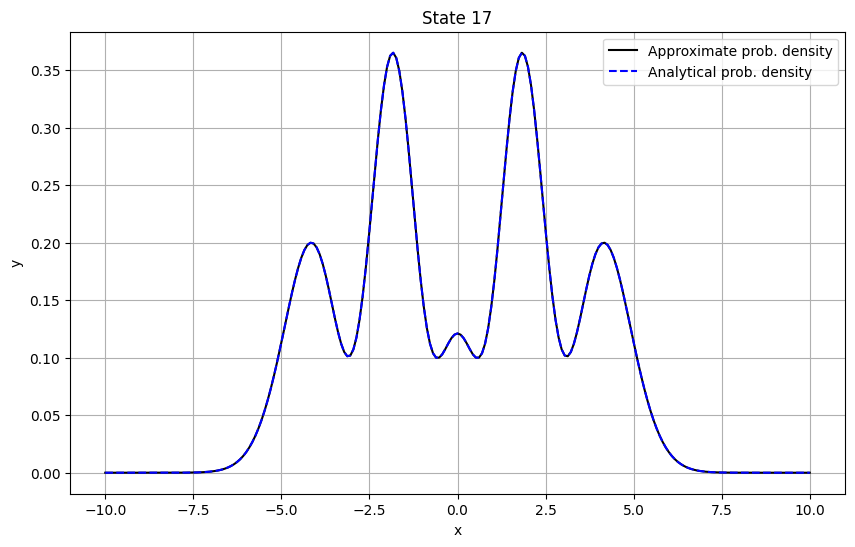

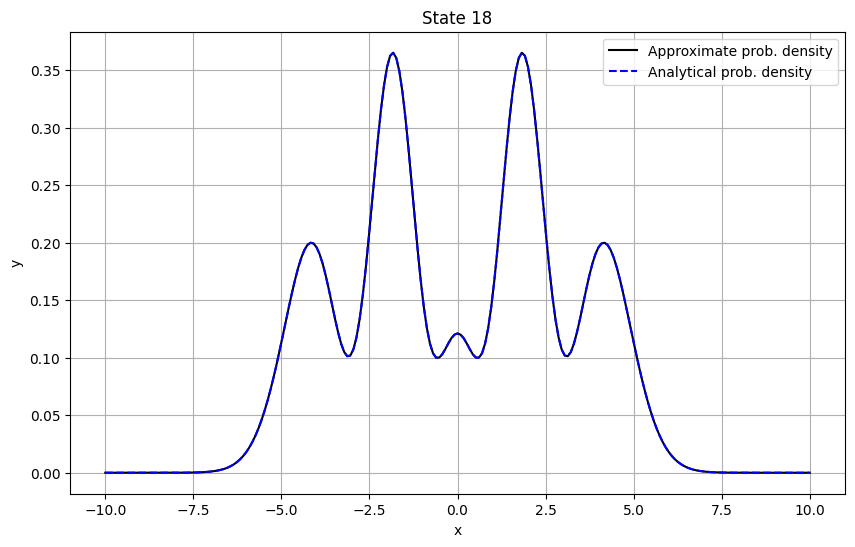

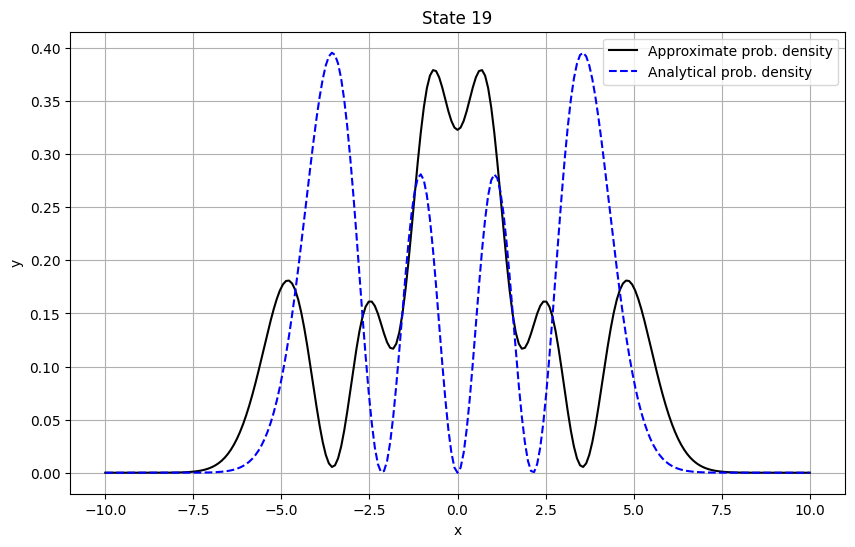

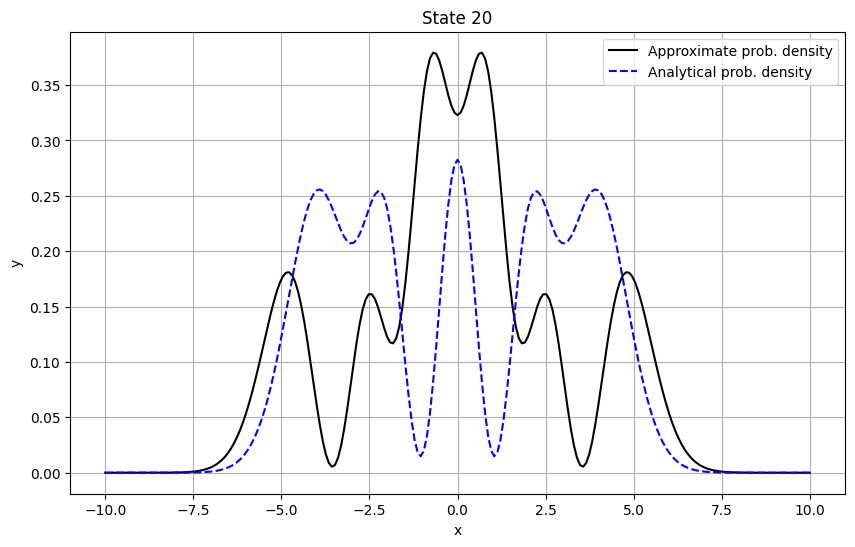

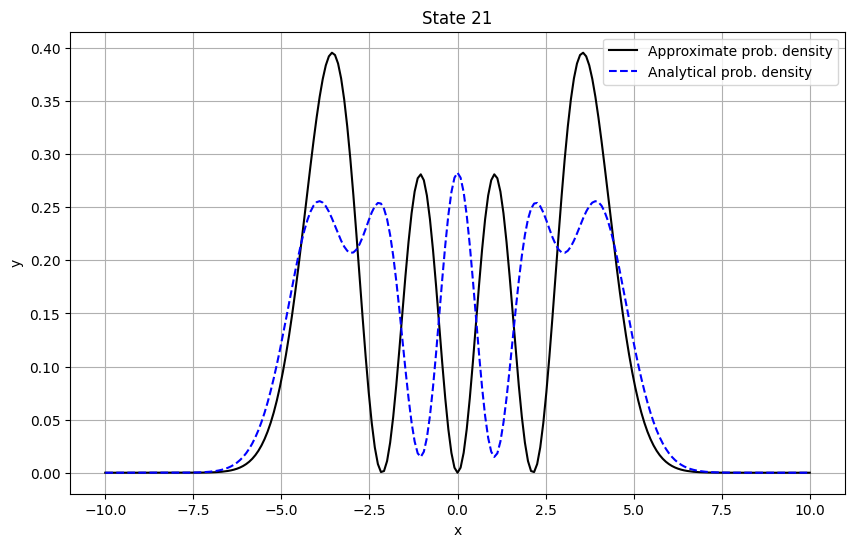

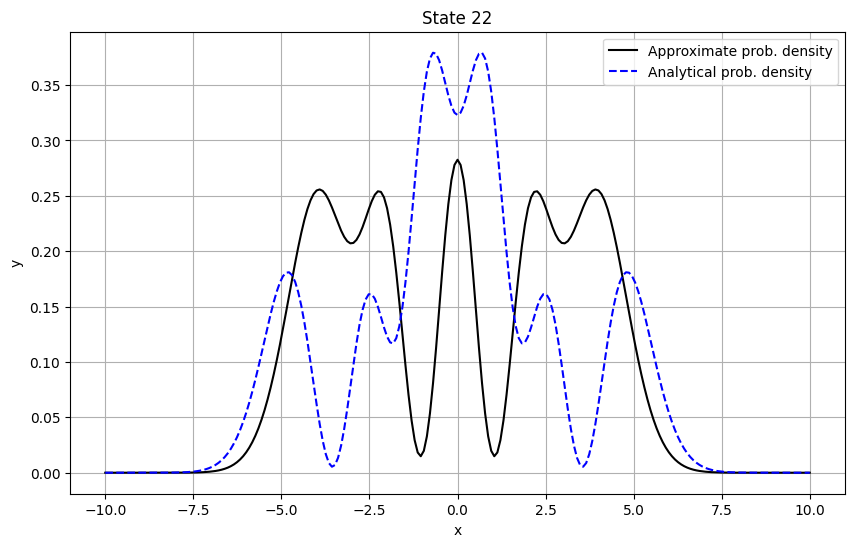

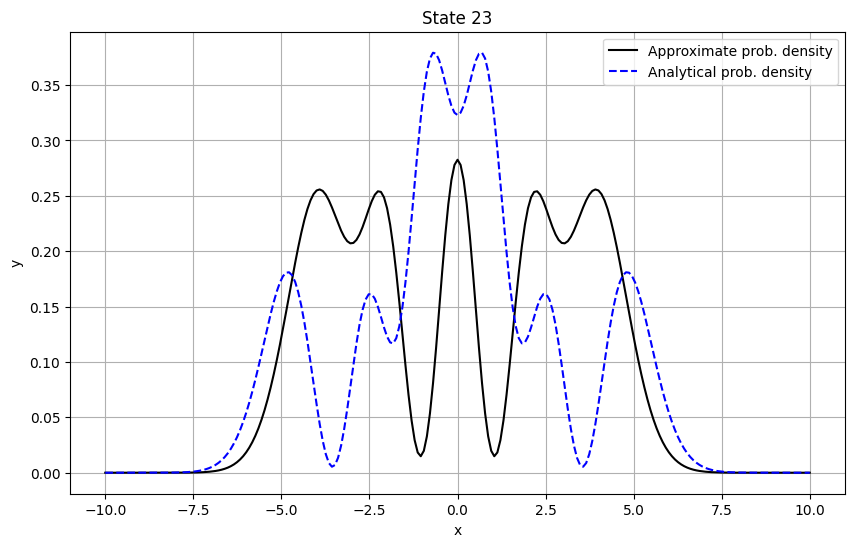

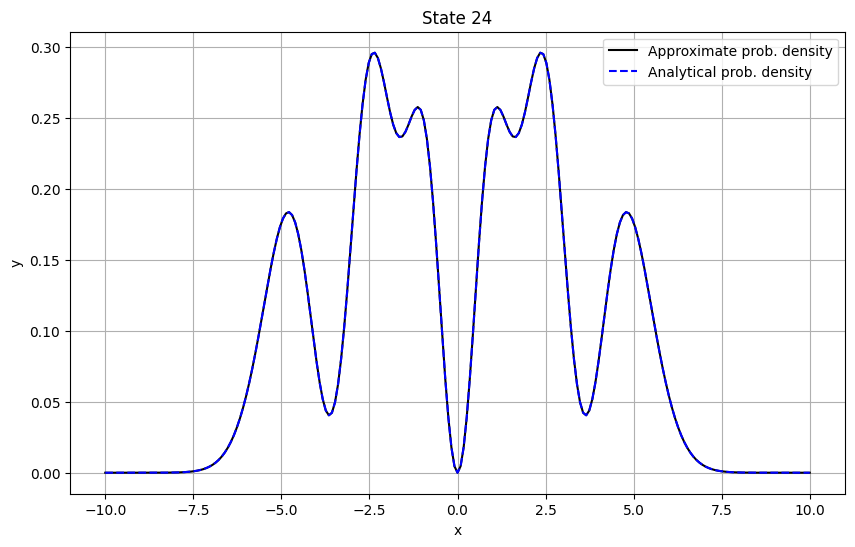

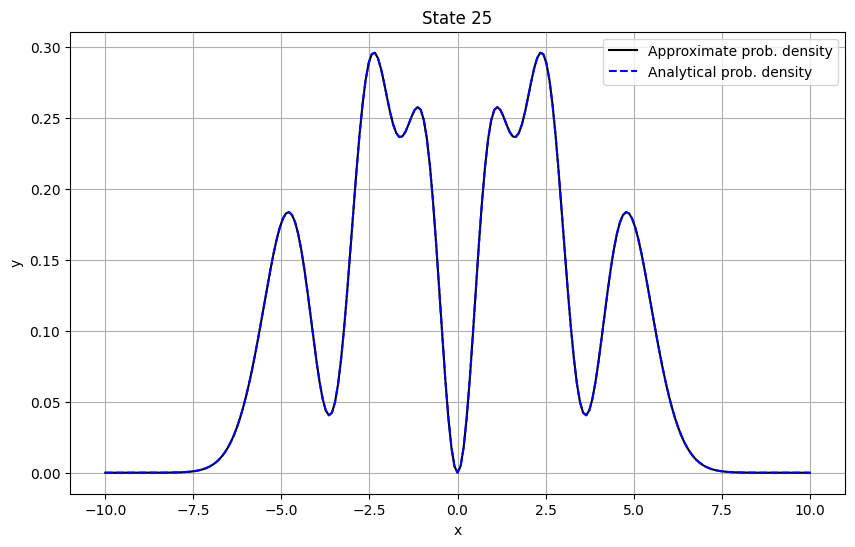

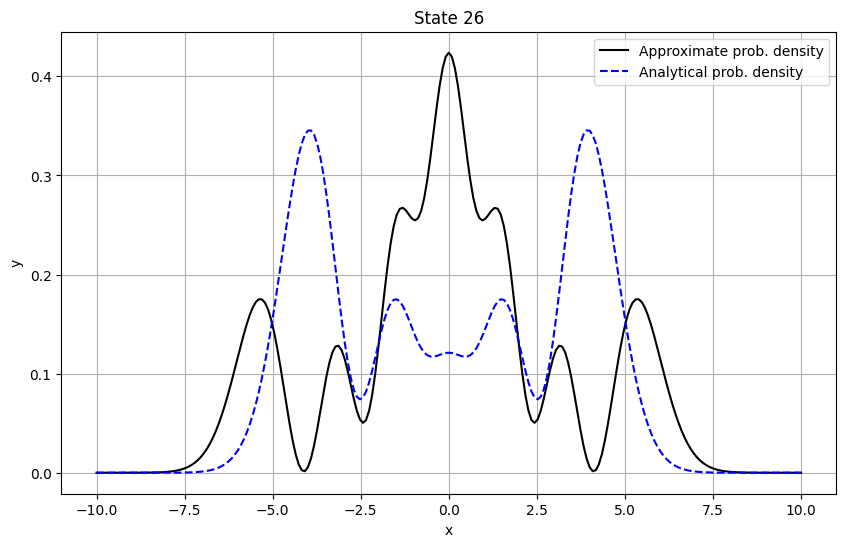

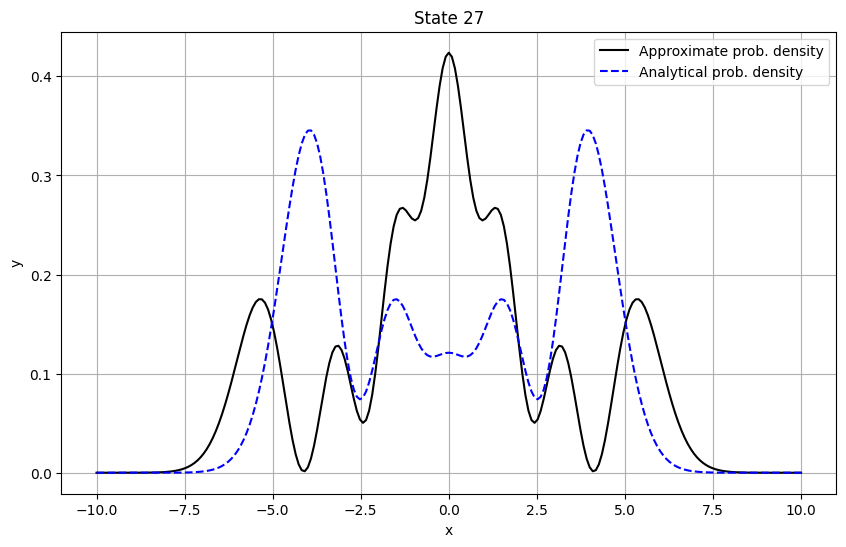

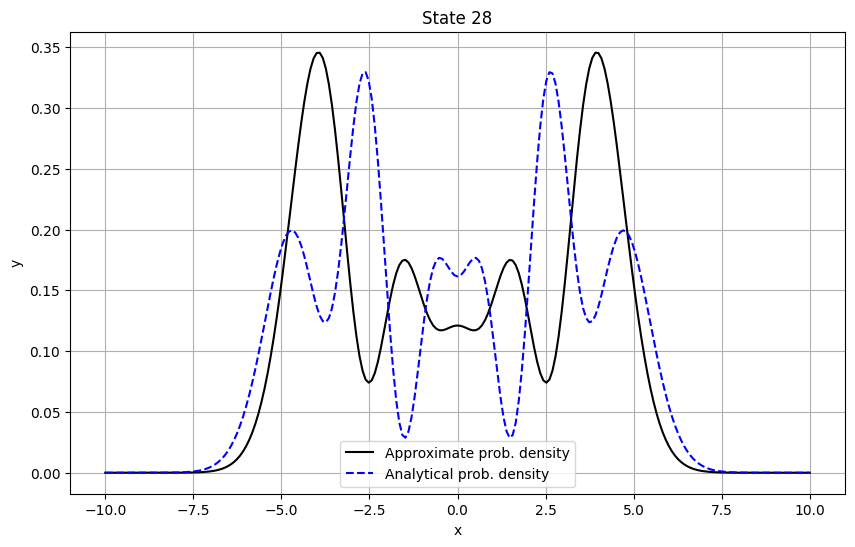

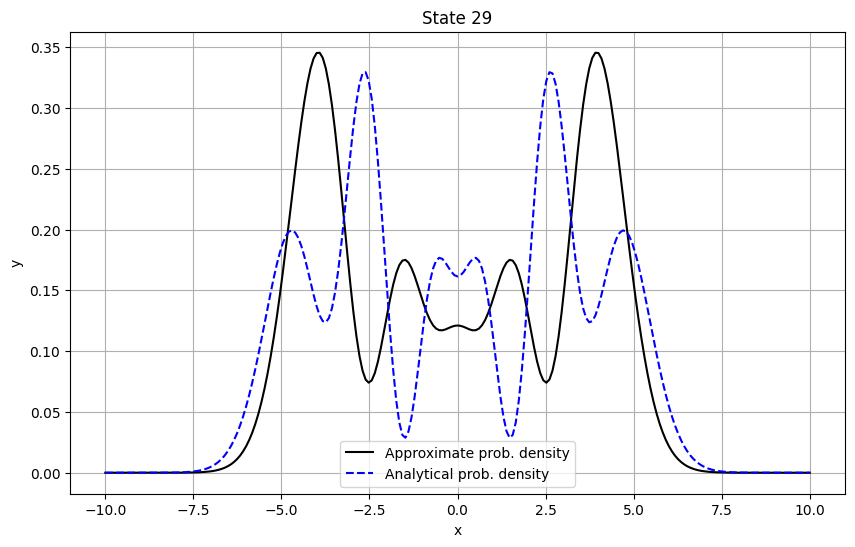

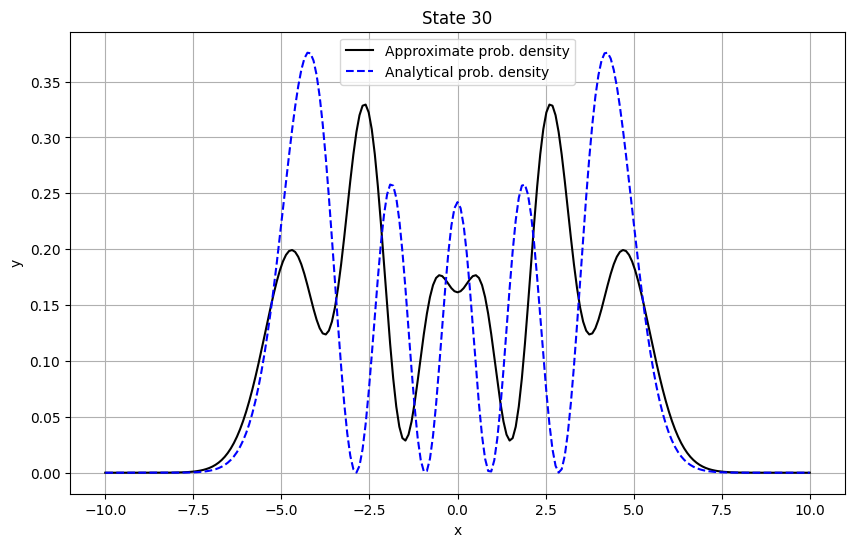

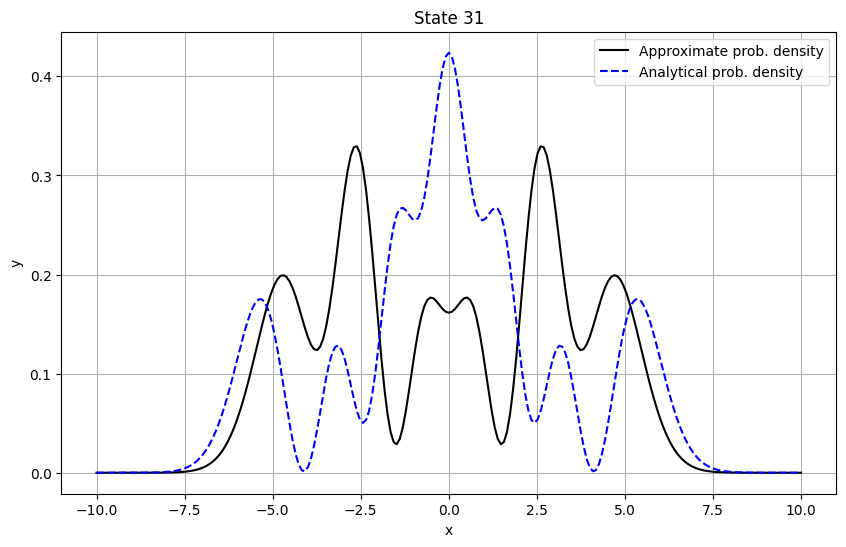

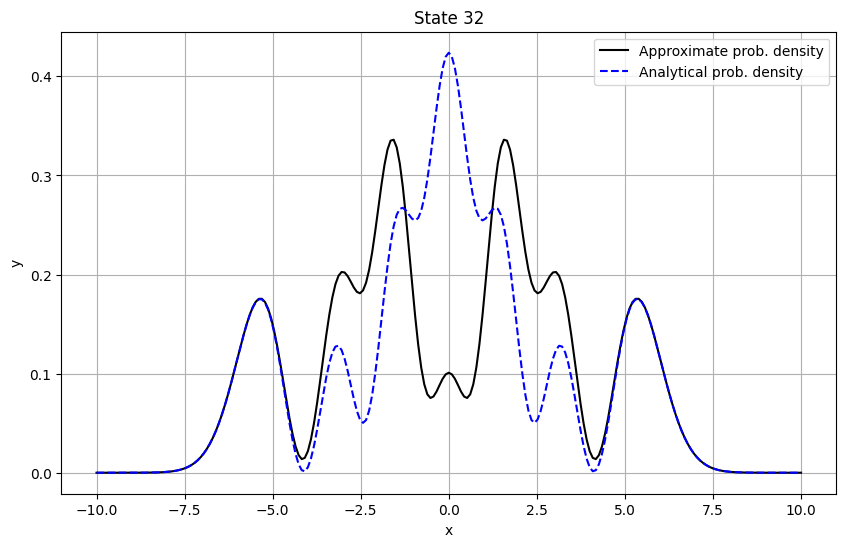

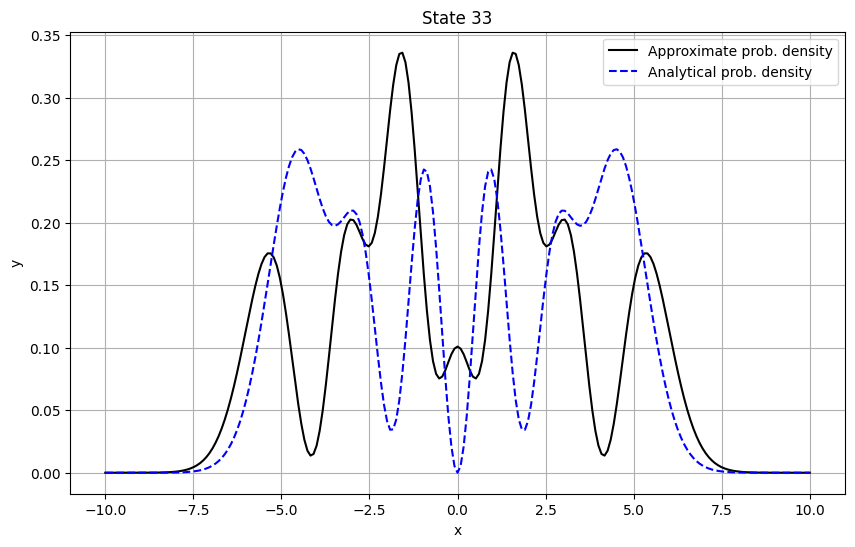

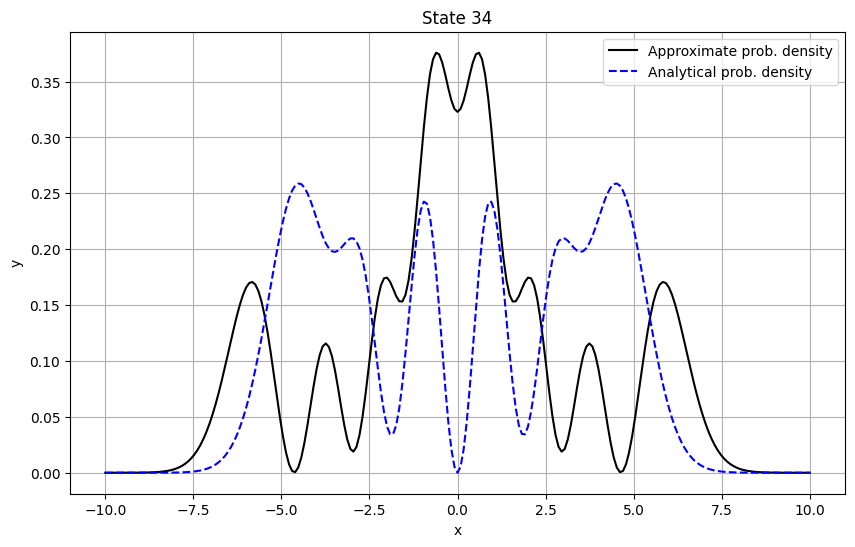

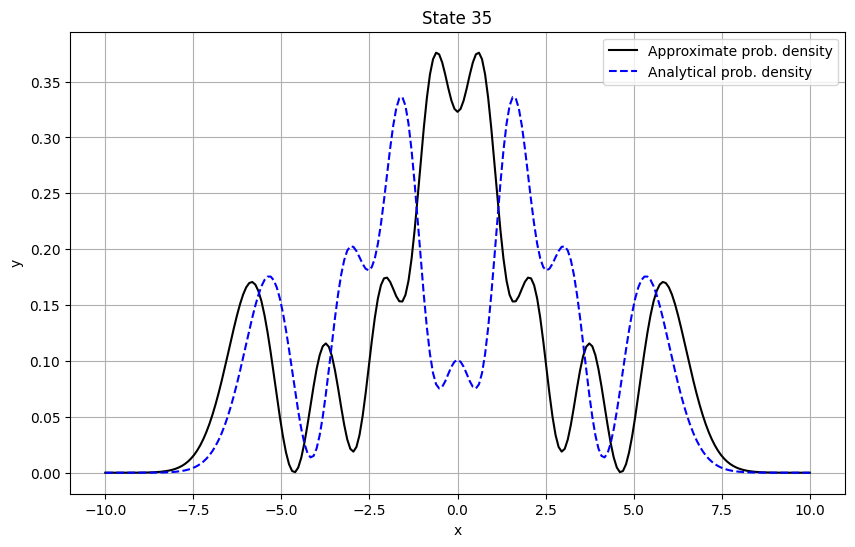

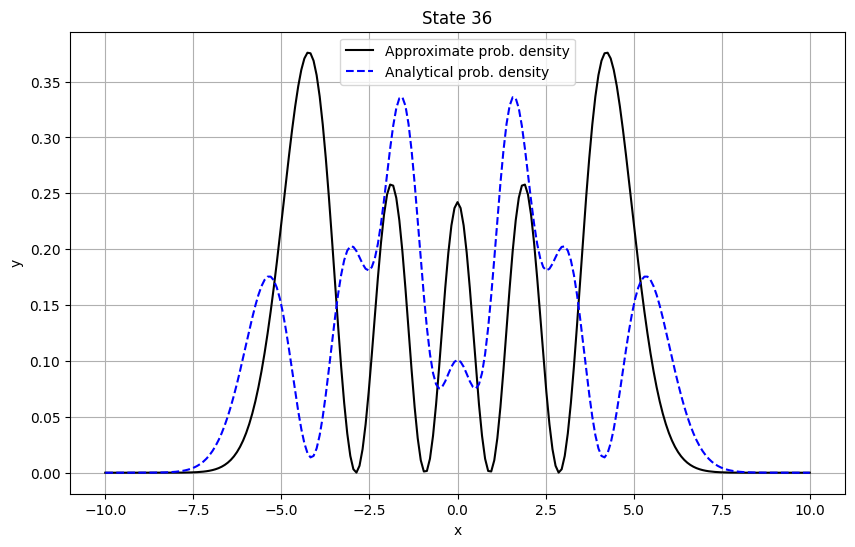

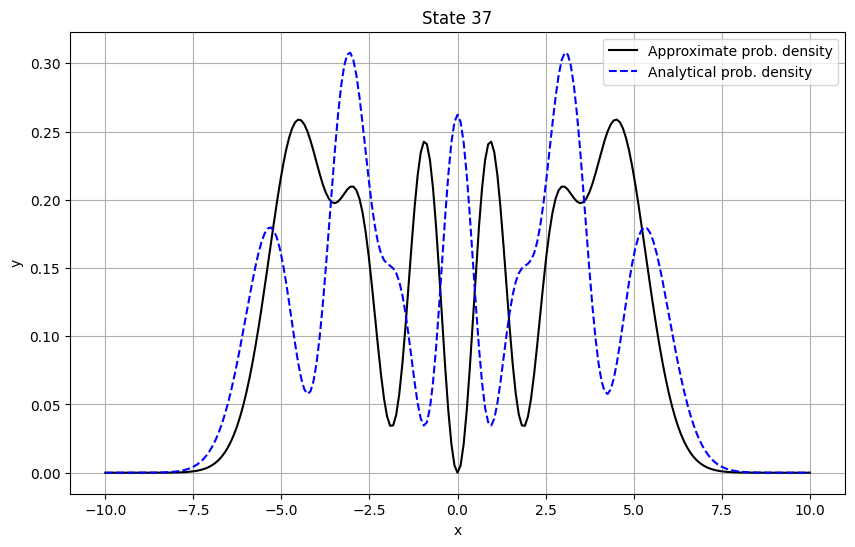

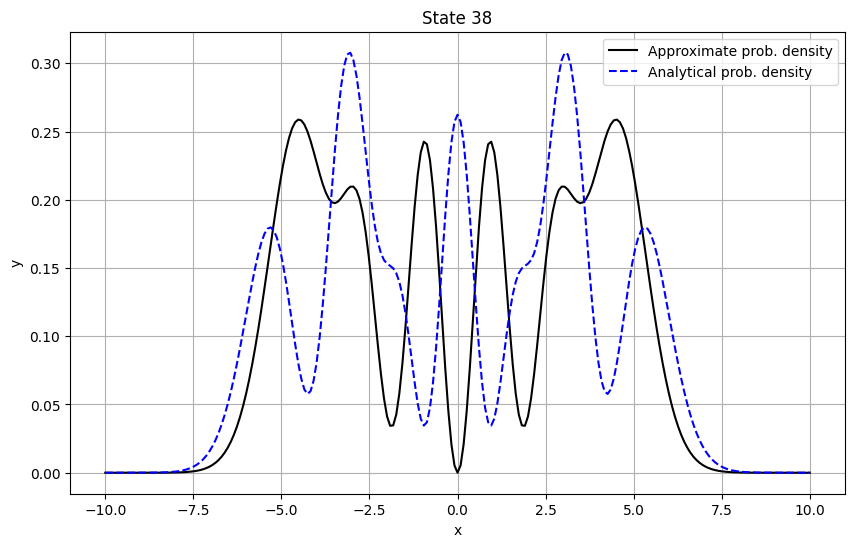

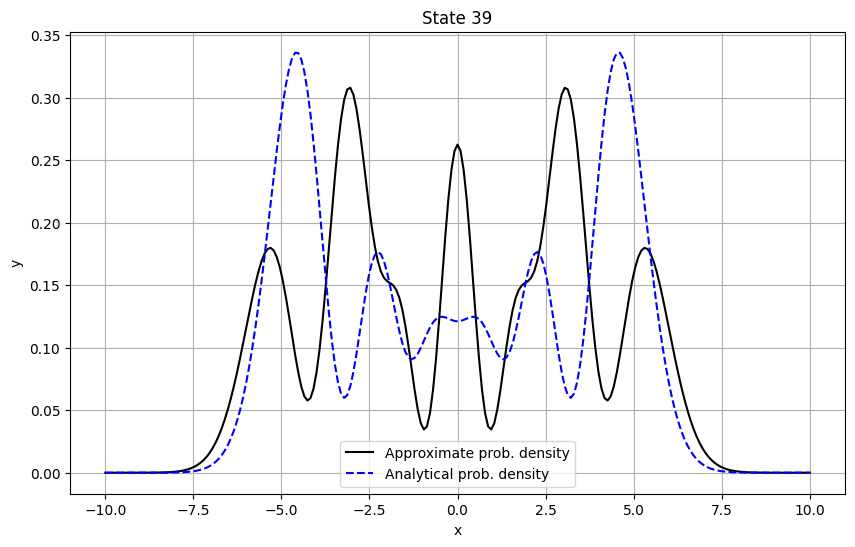

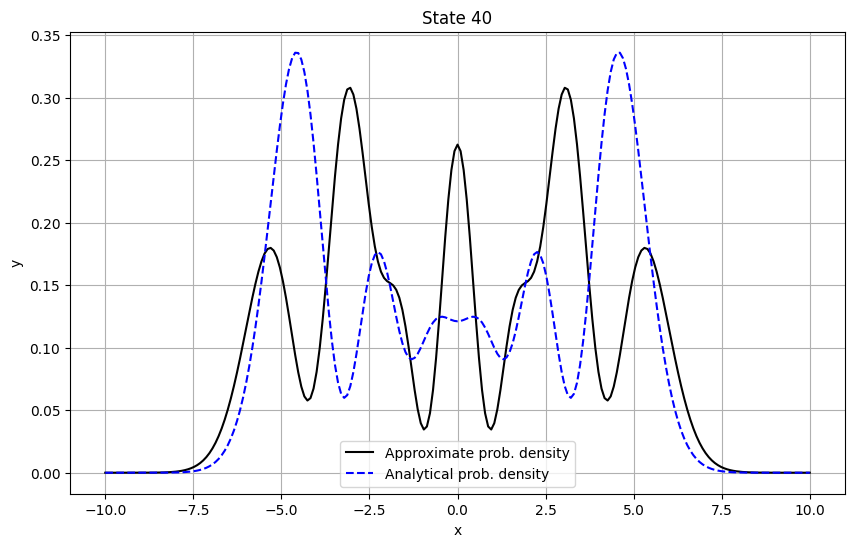

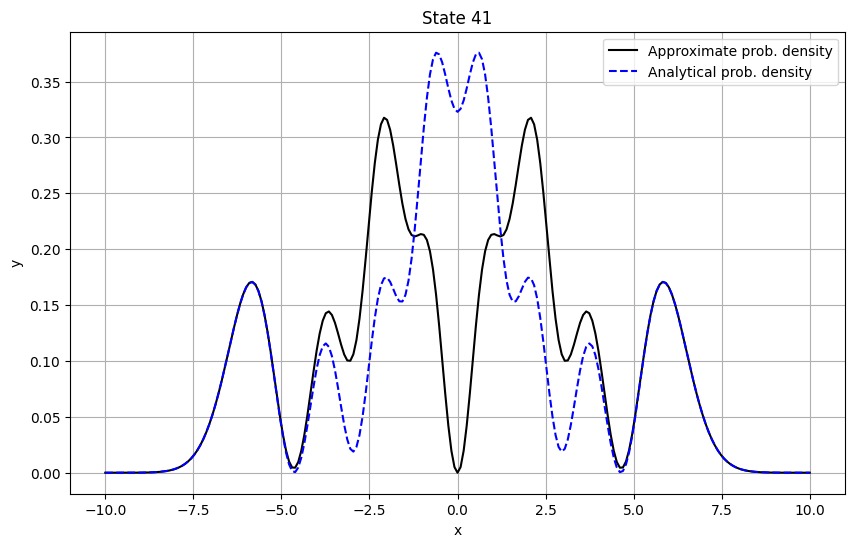

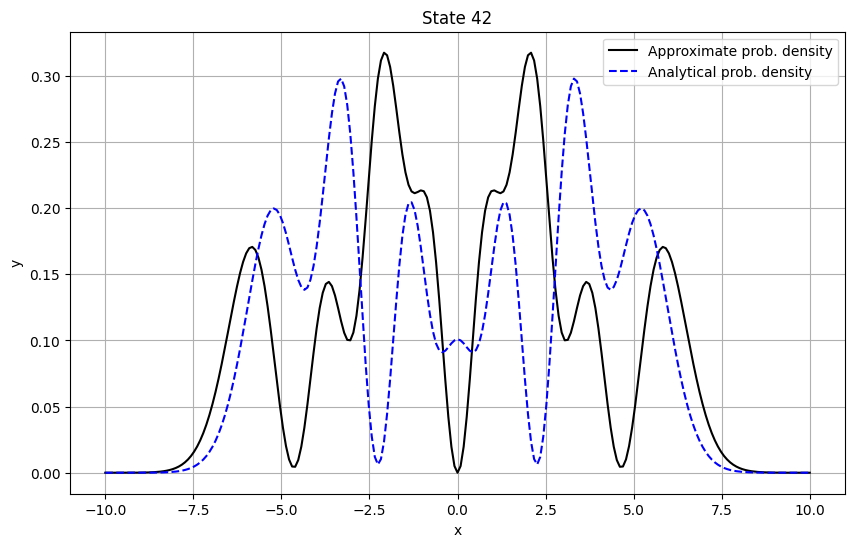

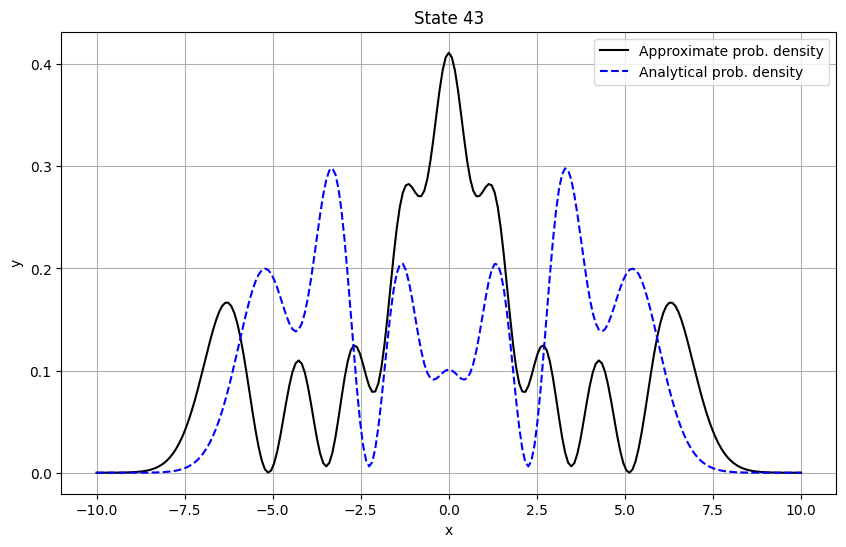

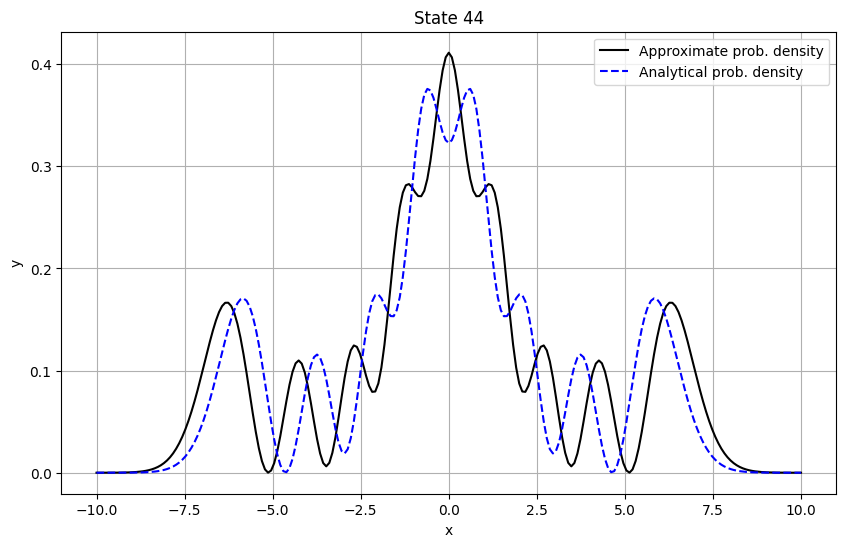

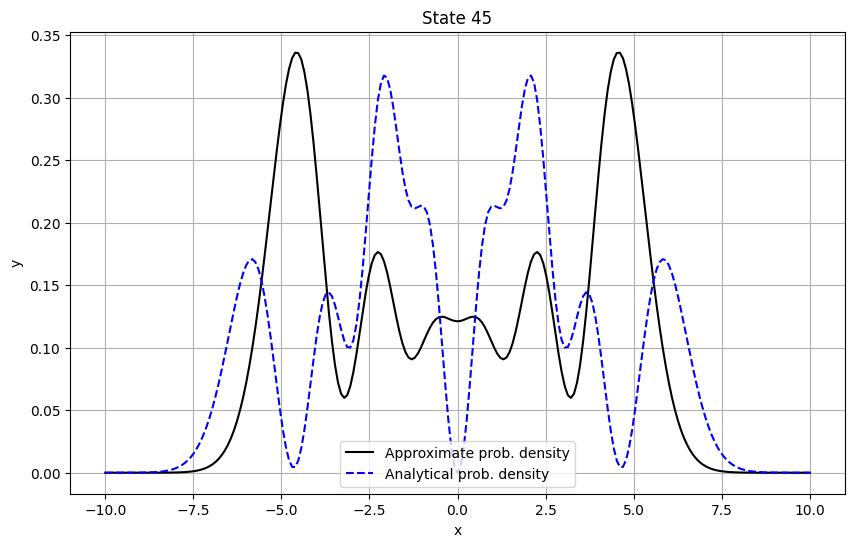

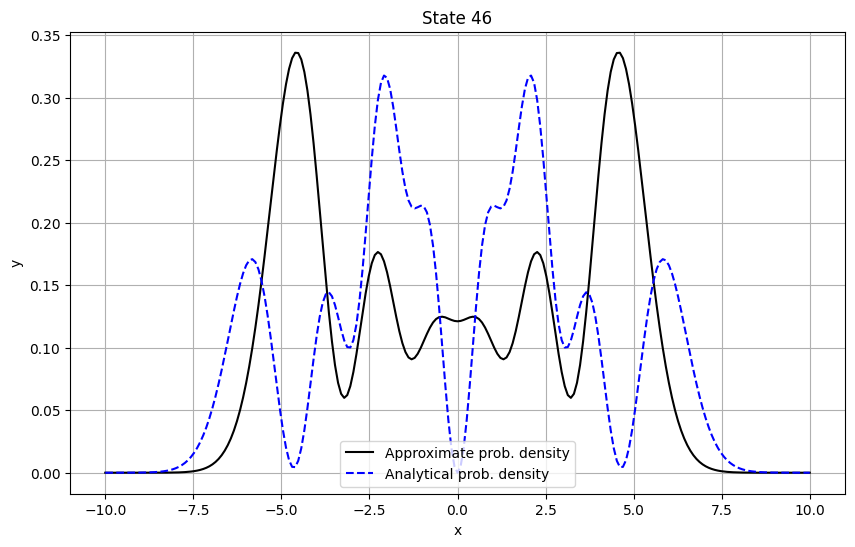

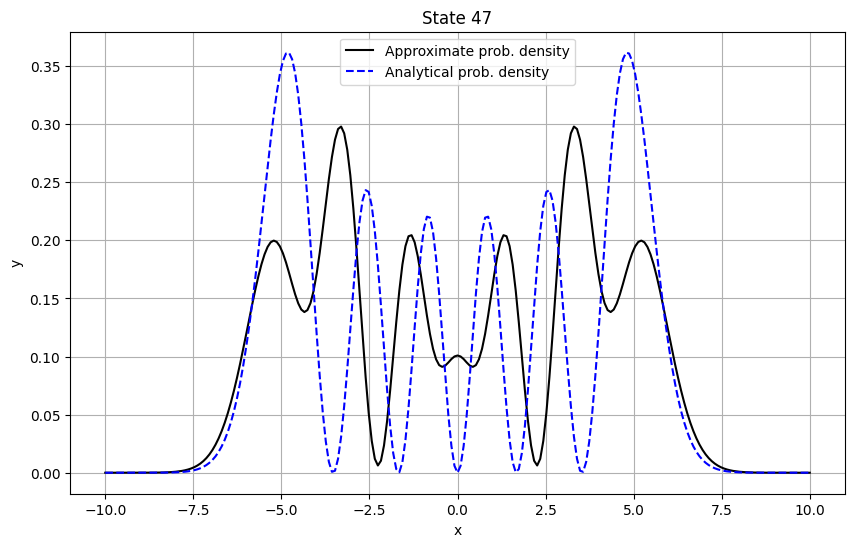

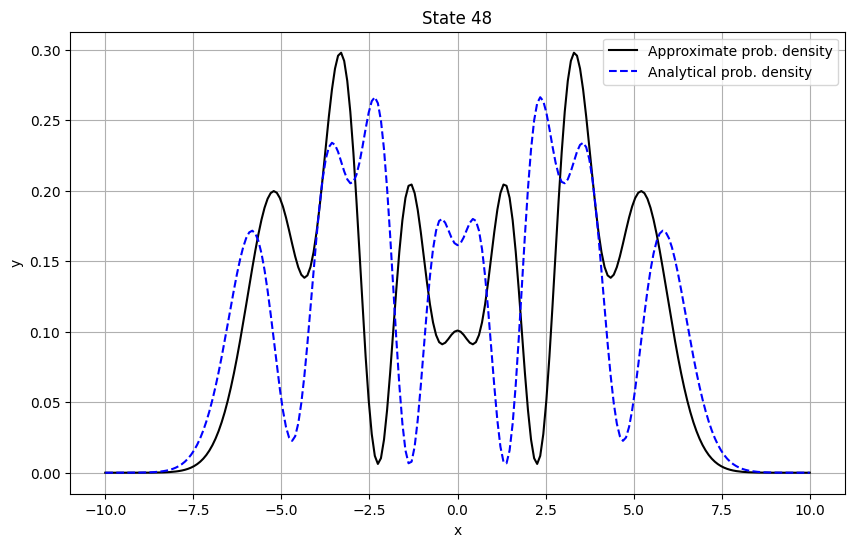

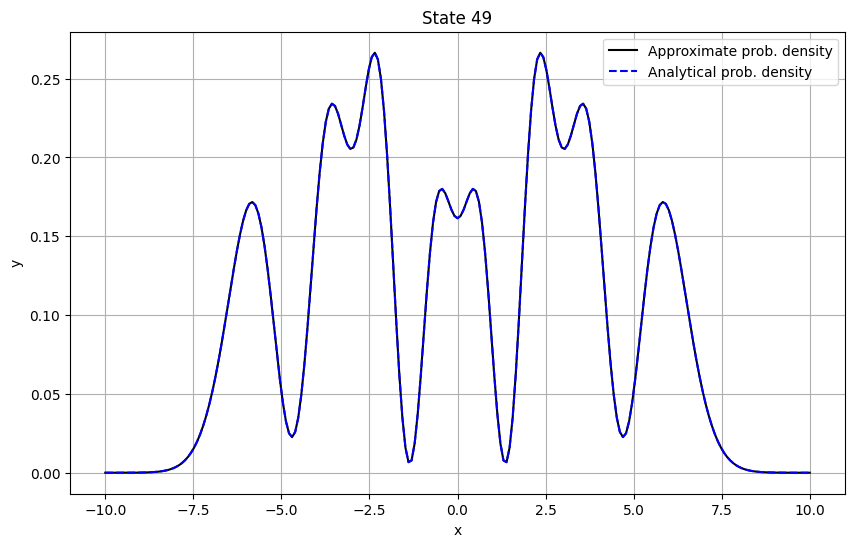

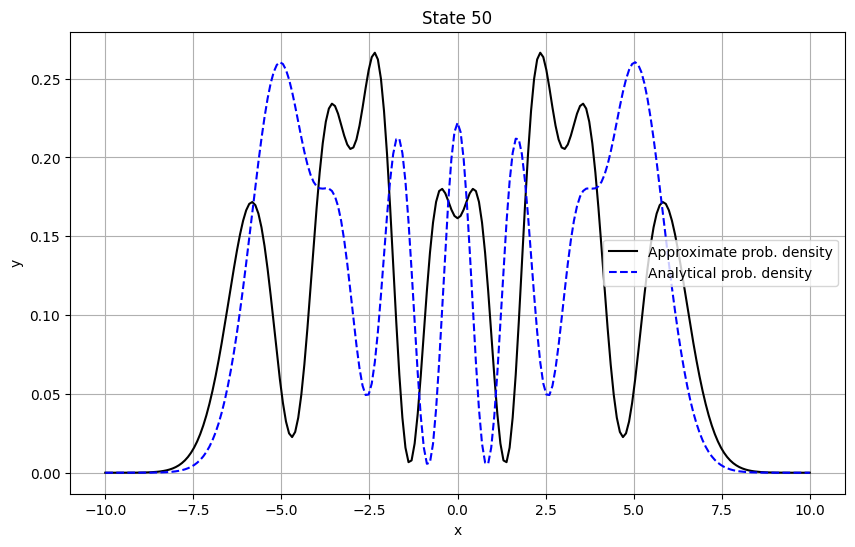

interactive(children=(IntSlider(value=0, description='k:', max=50), Output()), _dom_classes=('widget-interact'…

In [4]:
states_density_comparison(states_zero_int, qho_double, index_list)